In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import *
sns.set_context("notebook", font_scale=1)
sns.set_palette('Accent')
sns.set_style('white')


In [2]:
dfs = []
for i in range(1, 51):
    try:
        df = pd.read_csv("../insights/animals_original/animals_regmh_0.0_0.0_0.0_{}.csv"
                         .format(i), '\t') 
        dfs.append(df)
    except:
        pass

df = pd.concat(dfs, axis=0)

m_inner_d = df["Avg node empirical distance"].mean()
m_outter_d = df["Avg centroid distance"].mean()

In [3]:
def aid_mapping(x, y, aid_map):
    Z = np.zeros((len(x), len(y)))
    for i, a in enumerate(x):
        for j, b in enumerate(y):
            Z[i, j] = aid_map["{} {}".format(a, b)]
    return Z

In [4]:
def aid_mapping_list(X, Y, aid_map):
    Z = []
    for a, b in zip(X, Y):
        Z.append(aid_map["{} {}".format(a, b)])
    return Z

In [5]:
params = ["0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0"]
coverted_params = list(map(float, params))

plts1 = []
plts2 = []
fname = ""
tmps = [] 

for _, C in enumerate(params):
    inner_d = []
    outter_d = []

    for ep in params:
        dfs = []
        for i in range(1, 51):
            try:
                fname = ("../insights/animals/animals_regmh_{}_{}_1.0_{}.csv"
                         .format(ep, C, i))
                df = pd.read_csv(fname, sep='\t')
                dfs.append(df)
            except:
                print(fname)
                
        aid = df["Avg node empirical distance"].mean()
        tmps.append(['AID imprv. (%)', np.log10(float(C)), np.log10(float(ep)), 
                     100*(- aid / m_inner_d + 1)])
        aod = df["Avg centroid distance"].mean()
        tmps.append(['AOD imprv. (%)', np.log10(float(C)), np.log10(float(ep)), 
                     100*(aod / m_outter_d - 1)])

df = pd.DataFrame(tmps, columns=['meas', 'C', 'ep', 'imprv'])

../insights/animals/animals_regmh_1000.0_0.001_1.0_2.csv
../insights/animals/animals_regmh_100.0_0.1_1.0_5.csv
../insights/animals/animals_regmh_0.01_1.0_1.0_3.csv
../insights/animals/animals_regmh_1.0_100.0_1.0_4.csv
../insights/animals/animals_regmh_10.0_1000.0_1.0_4.csv


Text(0.5, 13.496000000000024, '$\\log_{10} \\epsilon_0$')

<Figure size 432x288 with 0 Axes>

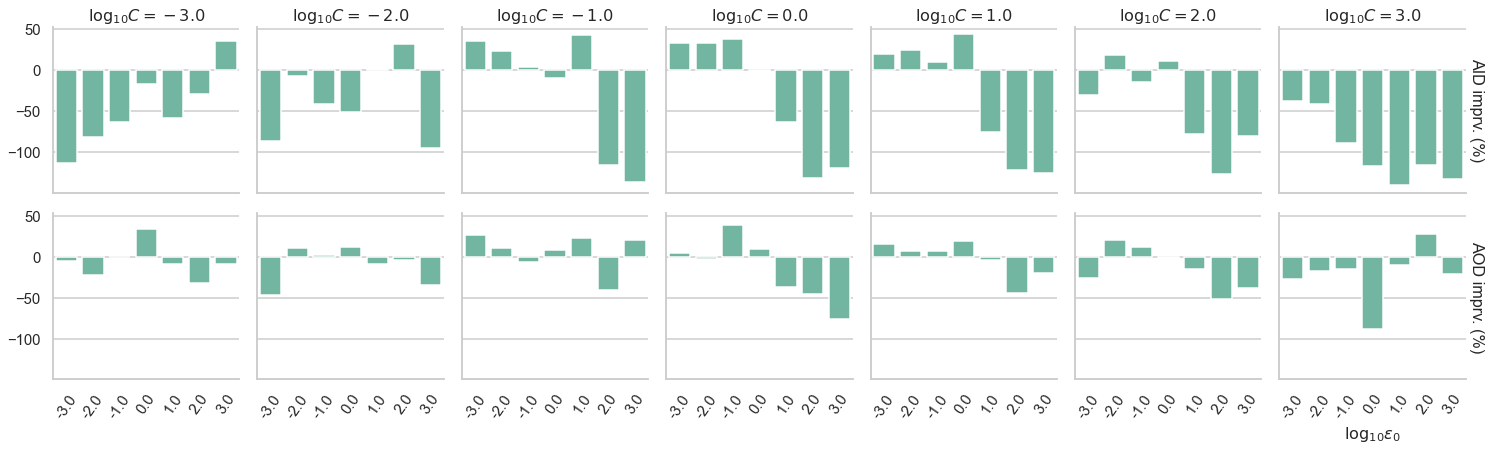

In [170]:
fg = plt.figure()
g = sns.FacetGrid(df, col="C", row="meas", margin_titles=True)
g.map_dataframe(sns.barplot, x="ep", y="imprv")
g.set_titles(col_template=r"$\log_{{10}} C = {col_name}$", 
             row_template="{row_name}")
g.set_xticklabels(rotation=55)
plt.xlabel(r"$\log_{10} \epsilon_0$")

In [6]:
df = pd.read_csv('animals_sens_processed.csv')

In [8]:
df

meas    C   ep       imprv
0   AID -3.0 -3.0  -55.809838
1   AOD -3.0 -3.0  -15.765732
2   AID -3.0 -2.0  -59.116804
3   AOD -3.0 -2.0  -15.581288
4   AID -3.0 -1.0  -48.366690
..  ...  ...  ...         ...
93  AOD  3.0  1.0  -30.535795
94  AID  3.0  2.0 -112.277449
95  AOD  3.0  2.0  -32.299013
96  AID  3.0  3.0 -108.005217
97  AOD  3.0  3.0  -30.670632

[98 rows x 4 columns]

Text(0.5, 13.496000000000024, '$\\log_{10} \\epsilon_0$')

<Figure size 432x288 with 0 Axes>

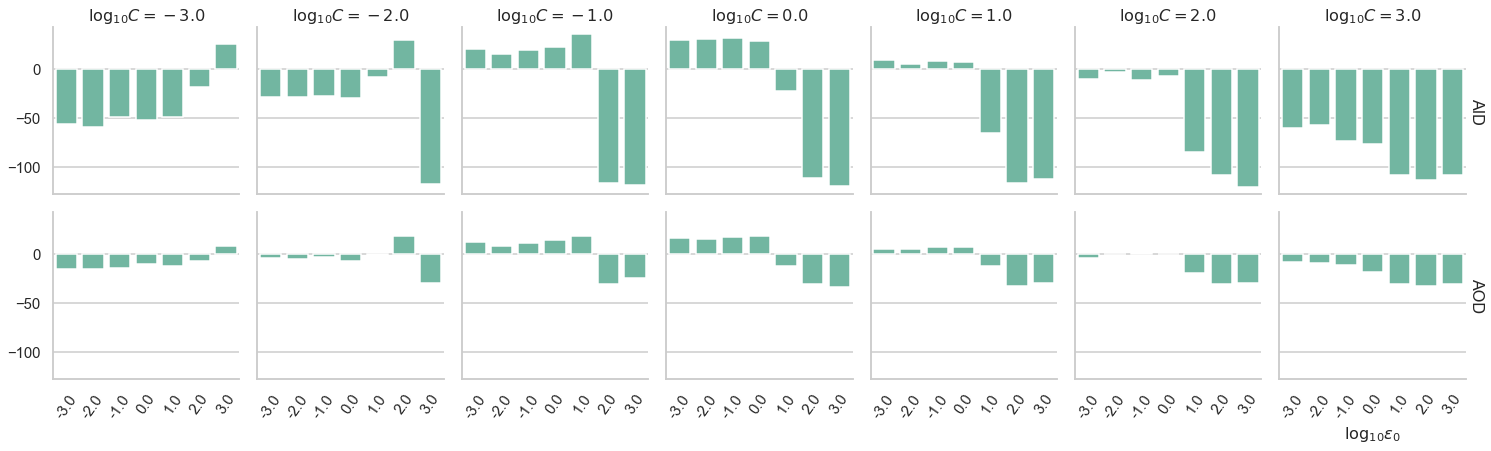

In [175]:
fg = plt.figure()
g = sns.FacetGrid(df, col="C", row="meas", margin_titles=True)
g.map_dataframe(sns.barplot, x="ep", y="imprv")
g.set_titles(col_template=r"$\log_{{10}} C = {col_name}$", 
             row_template="{row_name}")
g.set_xticklabels(rotation=55)
plt.xlabel(r"$\log_{10} \epsilon_0$")

In [7]:
def aid_mapping(x, y, aid_map):
    Z = np.zeros((len(x), len(y)))
    for i in range(7):
        for j in range(7):
            Z[i, j] = aid_map["{} {}".format(x[i, j], y[i, j])]
    return Z

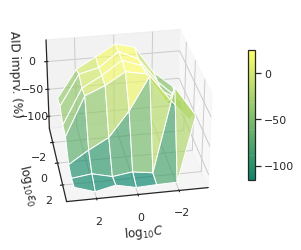

In [31]:
df = pd.read_csv('animals_sens_processed.csv')

aid_map = {}
tmps = df[df['meas'] == 'AID'].values
for tmp in tmps:
    k = '{} {}'.format(int(float(tmp[1])), int(float(tmp[2])))
    aid_map[k] = tmp[-1]
                       
tmps = np.array(tmps)

fig = plt.figure()
ax = fig.gca(projection = '3d')

a = [-3, -2, -1, 0, 1, 2, 3]
X, Y = np.meshgrid(a, a)
Z = aid_mapping(X, Y, aid_map)

# ax.set_zticks([20, -40, -70, -100])

ax.set_xlabel(r'$\log_{10} C$')
ax.set_ylabel(r'$\log_{10} \epsilon_0$')
ax.set_zlabel('AID imprv. (%)')
p = ax.plot_surface(X, Y, Z, alpha=0.65, cmap='summer')
fig.colorbar(p, shrink=0.6, aspect=20)

# ax.view_init(55, 50)
ax.view_init(30, 80)

# plt.tight_layout()

fig.savefig('sens_animals_aid.pdf')

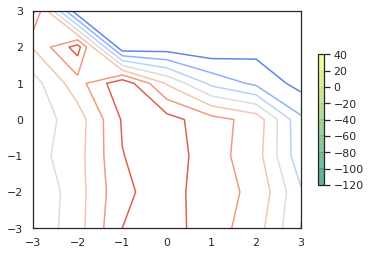

In [18]:
fig = plt.figure()
ax = fig.gca()
ax.contour(X, Y, Z, cmap='coolwarm')
fig.colorbar(p, shrink=0.6, aspect=20)


KeyError: '3 -3'

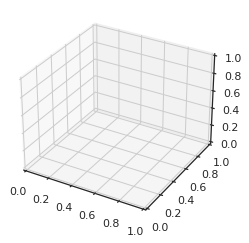

In [22]:
aid_map = {}
tmps = df[df['meas'] == 'AOD'].values
for tmp in tmps:
    k = '{} {}'.format(int(float(tmp[1])), int(float(tmp[2])))
    aid_map[k] = tmp[-1]
                       
tmps = np.array(tmps)

fig = plt.figure()
ax = fig.gca(projection = '3d')

a = [-3, -2, -1, 0, 1, 2, 3]
X, Y = np.meshgrid(a, a)
Z = aid_mapping(X, Y, aid_map)

ax.set_xlabel(r'$\log_{10} C$')
ax.set_ylabel(r'$\log_{10} \epsilon_0$')
ax.set_zlabel('AOD imprv. (%)')
p = ax.plot_surface(X, Y, Z, cmap='summer', alpha=0.65)
fig.colorbar(p, shrink=0.6, aspect=20)

ax.view_init(70, 40)

# plt.tight_layout()

fig.savefig('sens_animals_aod.pdf')

In [19]:
df = pd.read_csv('fmnist_sens_processed.csv')

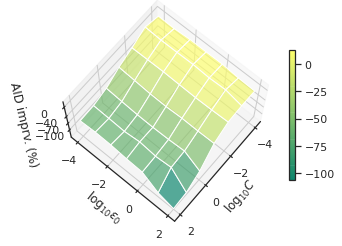

In [20]:
aid_map = {}
tmps = df[df['meas'] == 'AID'].values
for tmp in tmps:
    k = '{} {}'.format(int(float(tmp[1])), int(float(tmp[2])))
    aid_map[k] = tmp[-1]
                       
tmps = np.array(tmps)

fig = plt.figure()
ax = fig.gca(projection = '3d')

a = [-4, -3, -2, -1, 0, 1, 2]
X, Y = np.meshgrid(a, a)
Z = aid_mapping(X, Y, aid_map)

ax.set_zticks([20, 0, -40, -70, -100])

ax.set_xlabel(r'$\log_{10} C$')
ax.set_ylabel(r'$\log_{10} \epsilon_0$')
ax.set_zlabel('AID imprv. (%)')
p = ax.plot_surface(X, Y, Z, alpha=0.65, cmap='summer')
fig.colorbar(p, shrink=0.6, aspect=20)

# ax.view_init(55, 50)
ax.view_init(70, 40)

# plt.tight_layout()

fig.savefig('sens_fmnist_aid.pdf')

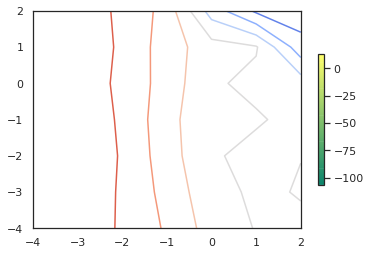

In [21]:
fig = plt.figure()
ax = fig.gca()
ax.contour(X, Y, Z, cmap='coolwarm')
fig.colorbar(p, shrink=0.6, aspect=20)


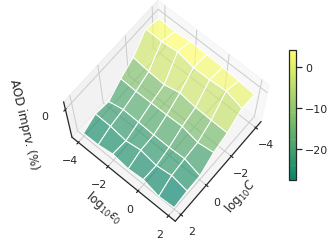

In [45]:
aid_map = {}
tmps = df[df['meas'] == 'AOD'].values
for tmp in tmps:
    k = '{} {}'.format(int(float(tmp[1])), int(float(tmp[2])))
    aid_map[k] = tmp[-1]
                       
tmps = np.array(tmps)

fig = plt.figure()
ax = fig.gca(projection = '3d')

a = [-4, -3, -2, -1, 0, 1, 2]
X, Y = np.meshgrid(a, a)
Z = aid_mapping(X, Y, aid_map)
    
ax.set_zticks([20, 0, -40, -70, -100])

ax.set_xlabel(r'$\log_{10} C$')
ax.set_ylabel(r'$\log_{10} \epsilon_0$')
ax.set_zlabel('AOD imprv. (%)')
p = ax.plot_surface(X, Y, Z, alpha=0.65, cmap='summer')
fig.colorbar(p, shrink=0.6, aspect=20)

# ax.view_init(55, 50)
ax.view_init(70, 40)

# plt.tight_layout()

fig.savefig('sens_fmnist_aod.pdf')